In [42]:
from fastai.vision.data import DataBlock
from fastai.vision.data import ImageBlock, CategoryBlock
from fastai.vision.data import get_image_files, parent_label
from fastai.vision.data import RandomSplitter
from fastai.vision.augment import Resize, RandomResizedCrop, aug_transforms
from fastai.vision.learner import vision_learner
from fastai.vision.models import resnet18
from fastai.metrics import accuracy, error_rate
from fastai.callback.schedule import lr_find
from fastai.callback.schedule import fit_one_cycle


In [43]:
PATH = "/Users/farid/Desktop/DeepLearningForCoders/BearClassifier/bears/"

SIZE = 128
BATCH_SIZE = 16

bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(SIZE))

dls = bears.dataloaders(PATH, bs=BATCH_SIZE)

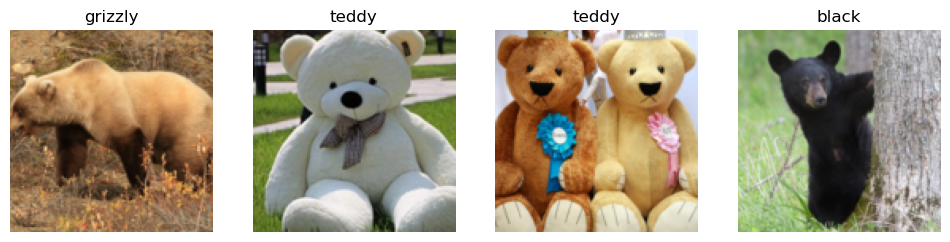

In [44]:
dls.valid.show_batch(max_n=4, nrows=1)

In [46]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fit_one_cycle(10, 1e-3)

/Users/farid/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/farid/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch     train_loss  valid_loss  error_rate  time    
0         1.760703    0.469266    0.157895    00:26                                       
1         1.057289    0.075238    0.035088    00:24                                       
2         0.679361    0.090805    0.035088    00:24                                       
3         0.461975    0.101804    0.052632    00:24                                       
4         0.348880    0.098858    0.017544    00:24                                       
5         0.264542    0.107911    0.017544    00:24                                       
6         0.212803    0.104428    0.052632    00:24                                       
7         0.177208    0.104421    0.052632    00:24                                       
8         0.152914    0.099648    0.052632    00:24                                       
9         0.138722    0.112035    0.052632    00:24                                        


In [54]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, 0.2),
    batch_tfms=aug_transforms()
)
dls = bears.dataloaders(PATH, bs=BATCH_SIZE)


Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


NotImplementedError: The operator 'aten::_linalg_solve_ex.result' is not currently implemented for the MPS device. If you want this op to be added in priority during the prototype phase of this feature, please comment on https://github.com/pytorch/pytorch/issues/77764. As a temporary fix, you can set the environment variable `PYTORCH_ENABLE_MPS_FALLBACK=1` to use the CPU as a fallback for this op. WARNING: this will be slower than running natively on MPS.